# Algorithmic Toolbox - Week 6 - Dynamic Programming 2

## 1.  Maximum Amount of Gold

In [1]:
%%writefile first.cpp
#include <bits/stdc++.h>

using namespace std;

int optimal_weight(int W, const vector<int> &w) {
    //write your code here
    int current_weight = 0;
    for (int i = 0; i < w.size(); ++i) {
        if (current_weight + w[i] <= W) {
        current_weight += w[i];
        }
    }
    return current_weight;
}

int knapsack(vector<int> &weights, vector<int> &prizes, int W) {
    int n = weights.size();
    vector<vector<int>> value(W + 1, vector<int> (n + 1));
    for (int i = 0; i < n + 1; i++) {
        value[0][i] = 0;
    }
    for (int i = 0; i < W + 1; i++) {
        value[i][0] = 0;
    }
    for (int i = 1; i <= n; i++) {
        for (int w = 1; w <= W; w++) {
            value[w][i] = value[w][i - 1];
            if (weights[i - 1] <= w) {
                int val = value[w - weights[i - 1]][i - 1] + prizes[i - 1];
                if (value[w][i] < val) {
                    value[w][i] = val;
                }
            }
        }
    }
    return value[W][n];
}

int main() {
    int n, W;
    cin >> W >> n;
    vector<int> weights(n);
    vector<int> prizes(n);
    for (int i = 0; i < n; i++) {
        cin >> weights[i];
        prizes[i] = weights[i];
    }
    sort(weights.begin(), weights.end());
    sort(prizes.begin(), prizes.end());
    int result = knapsack(weights, prizes, W);
    cout << result << '\n';
    return 0;
}

Writing first.cpp


## 3. Maximum Value of an Arithmetic Expression

In [2]:
%%writefile third.cpp
#include <bits/stdc++.h>

using namespace std;

const int max_size = 14 + 1;
long long m[max_size + 1][max_size + 1];
long long M[max_size + 1][max_size + 1];

long long minimum_five (long long a, long long b, long long c, long long d, long long e) {
    if (a < b && a < c && a < d && a < e) {
        return a;
    }
    if (b < a && b < c && b < d && b < e) {
        return b;
    }
    if (c < a && c < b && c < d && c < e) {
        return c;
    }
    if (d < a && d < b && d < c && d < e) {
        return d;
    }
    return e;
}

long long maximum_five (long long a, long long b, long long c, long long d, long long e) {
    if (a > b && a > c && a > d && a > e) {
        return a;
    }
    if (b > a && b > c && b > d && b > e) {
        return b;
    }
    if (c > a && c > b && c > d && c > e) {
        return c;
    }
    if (d > a && d > b && d > c && d > e) {
        return d;
    }
    return e;
}

pair<long long, long long> min_and_max(long long i, long long j, vector<char> &operations) {
    long long minimum = LONG_LONG_MAX;
    long long maximum = LONG_LONG_MIN;
    for (int k = i; k < j; k++) {
        long long a, b, c, d;
        if (operations[k] == '+') {
            a = M[i][k] + M[k + 1][j];
            b = M[i][k] + m[k + 1][j];
            c = m[i][k] + M[k + 1][j];
            d = m[i][k] + m[k + 1][j];
        } else if (operations[k] == '-') {
            a = M[i][k] - M[k + 1][j];
            b = M[i][k] - m[k + 1][j];
            c = m[i][k] - M[k + 1][j];
            d = m[i][k] - m[k + 1][j];
        } else {
            a = M[i][k] * M[k + 1][j];
            b = M[i][k] * m[k + 1][j];
            c = m[i][k] * M[k + 1][j];
            d = m[i][k] * m[k + 1][j];
        }
        minimum = minimum_five(minimum, a, b, c, d);
        maximum = maximum_five(maximum, a, b, c, d);
    }
    return {minimum, maximum};
}

long long parentheses(vector<int> &numbers, vector<char> &operations) {
    int n = numbers.size();
    for (int i = 0; i < n; i++) {
        m[i][i] = numbers[i];
        M[i][i] = numbers[i];
    }
    for (int s = 1; s < n; s++) {
        for (int i = 0; i < n - s; i++) {
            int j = i + s;
            if (i != j) {
                pair<long long, long long> r = min_and_max(i, j, operations);
                m[i][j] = r.first;
                M[i][j] = r.second;
            }
        }
    }
    return M[0][n - 1];
}

int main() {
    string s;
    cin >> s;
    vector<int> numbers;
    vector<char> operations;
    int number;
    for (int i = 0; i < s.length(); i += 2) {
        number = s[i] - '0';
        numbers.push_back(number);
    }
    for (int i = 1; i < s.length() - 1; i += 2) {
        operations.push_back(s[i]);
    }
    for (int i = 0; i < numbers.size(); i++) {
        for (int j = 0; j < numbers.size(); j++) {
            m[i][j] = 0;
            M[i][j] = INT_MIN;
        }
    }
    long long result = parentheses(numbers, operations);
    /*for (int i = 0; i < numbers.size(); i++) {
        for (int j = 0; j < numbers.size(); j++) {
            cout << m[i][j] % 500 << '\t';
        }
        cout << '\n';
    }
    cout << '\n';
    for (int i = 0; i < numbers.size(); i++) {
        for (int j = 0; j < numbers.size(); j++) {
            cout << M[i][j] % 500 << '\t';
        }
        cout << '\n';
    }
    cout << '\n';*/
    cout << result << '\n';
    return 0;
}

Writing third.cpp


## Veredict

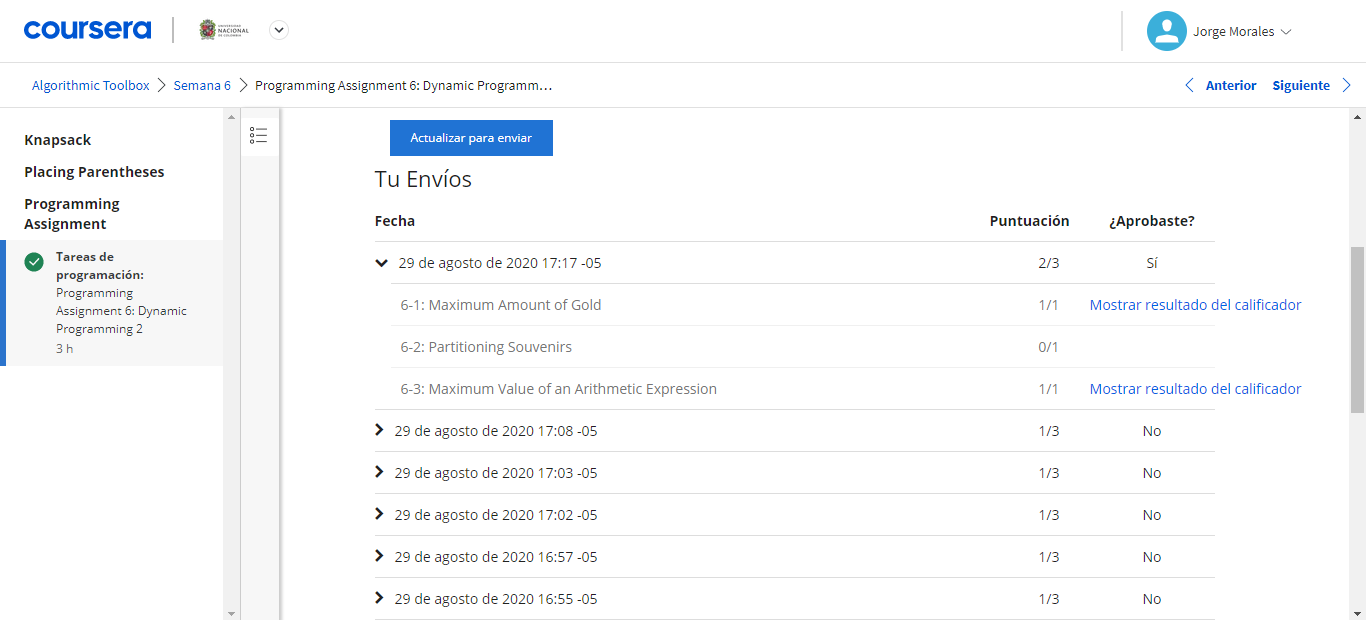